In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from matplotlib.ticker import FuncFormatter
import numpy as np

In [2]:
#os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_FOOD_rebal")
#os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_USER_norebal")
#os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_MIXED_rebal")

os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/MIXED_SS_new")

In [3]:
extension = 'csv'

#User trips
user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]

#Food rips
food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]


In [4]:
numitems_people = len(user_filenames)
print(numitems_people)

numitems_food = len(food_filenames)
print(numitems_food)

38
38


In [5]:
df_total_user = []

for f in user_filenames:
 temp_f = pd.read_csv(f)
 print(len(temp_f))
 df_total_user.append(temp_f)

19156
19156
19155
19155
19156
19157
19155
19154
19154
19155
19156
19156
19156
19157
19155
19154
19155
19155
19156
19156
19155
19155
19154
19156
19156
19155
19156
19155
19154
19156
19153
19155
19153
19155
19156
19155
19156
19153


In [6]:
df_total_food = []

for f in food_filenames:
 temp_f = pd.read_csv(f)
 print(len(temp_f))
 df_total_food.append(temp_f)

6498
6497
6497
6496
6498
6498
6495
6498
6496
6497
6497
6497
6497
6496
6494
6497
6498
6497
6497
6494
6497
6498
6497
6496
6498
6498
6498
6495
6498
6498
6498
6495
6495
6497
6495
6497
6496
6497


In [7]:

counts_nbikes_all_food = []

for sim_user in df_total_food:
    #sim_user['Day'] = sim_user['Day'] - 6
    sim_user['start_time_ed'] = pd.to_datetime(sim_user['Time']).dt.floor('15Min')
    counts_nbikes = sim_user.groupby(['Day', 'start_time_ed'])['NumBikes'].max().reset_index()
    counts_nbikes_all_food.append(counts_nbikes)

In [8]:

counts_nbikes_all = []

for sim_user in df_total_user:
    #sim_user['Day'] = sim_user['Day'] - 6
    sim_user['start_time_ed'] = pd.to_datetime(sim_user['Time']).dt.floor('15Min')
    counts_nbikes = sim_user.groupby(['Day', 'start_time_ed'])['NumBikes'].max().reset_index()
    counts_nbikes_all.append(counts_nbikes)


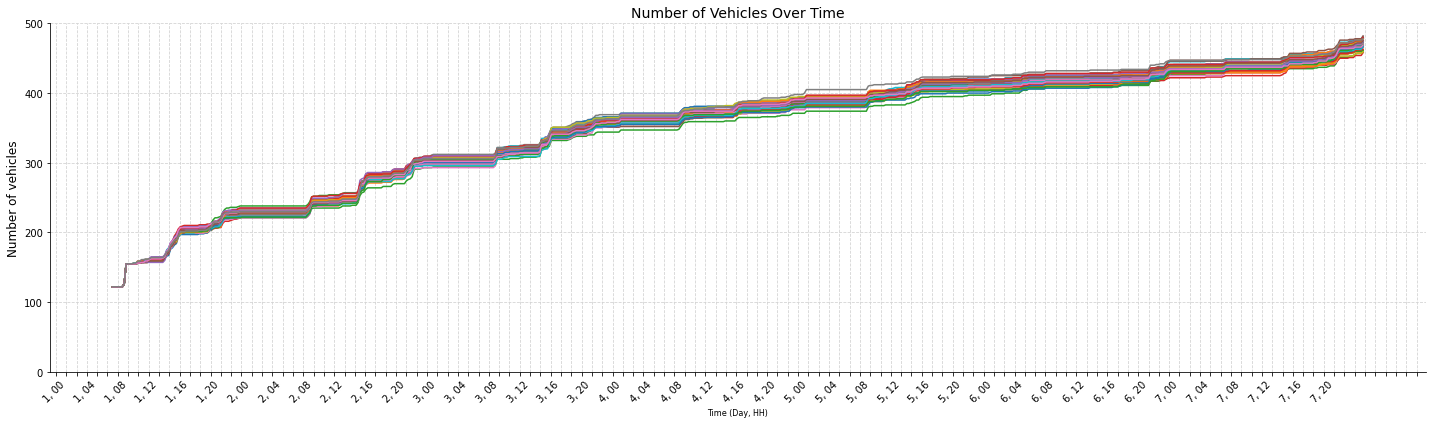

In [9]:
# Continue with your plotting code
fig, ax = plt.subplots(figsize=(20, 6))

# Plot each DataFrame as a separate line
for i, df in enumerate(counts_nbikes_all[:38]):
    total_minutes = (df['Day'] * 24 * 60) + (df['start_time_ed'].dt.hour * 60) + df['start_time_ed'].dt.minute
    ax.plot(total_minutes, df['NumBikes'], label=f'DataFrame {i+1}')

# Customize x-axis tick labels
days = df['Day'].unique()
hours = df['start_time_ed'].dt.hour.unique()
xtick_positions = [(day * 24 * 60) + (hour * 60) for day in days for hour in hours]
xtick_labels = [f'{day}, {hour:02d}' for day in days for hour in hours]

ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels)

plt.xlabel('Time (Day, HH)', fontsize=8)
plt.ylabel('Number of vehicles', fontsize=12)
plt.title('Number of Vehicles Over Time', fontsize=14)

plt.grid(color='lightgray', linestyle='--')
plt.ylim(0)

plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=45, ha='right')

plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='both', nbins=168))

#plt.legend(loc='best')  # Show the legend

plt.tight_layout()
plt.show()

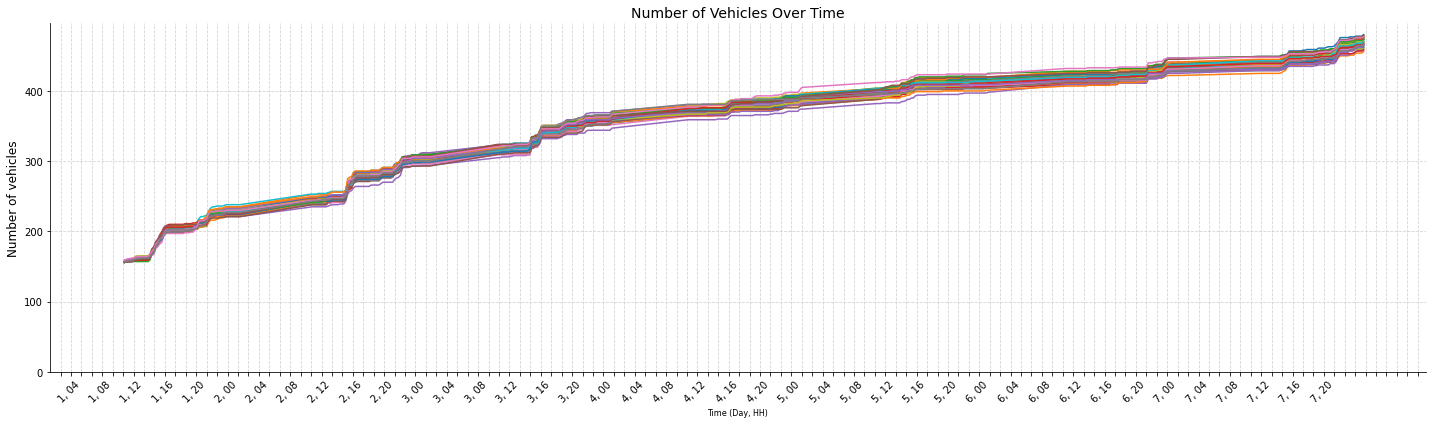

In [10]:
# Continue with your plotting code
fig, ax = plt.subplots(figsize=(20, 6))

# Plot each DataFrame as a separate line
for i, df in enumerate(counts_nbikes_all_food[:38]):
    total_minutes = (df['Day'] * 24 * 60) + (df['start_time_ed'].dt.hour * 60) + df['start_time_ed'].dt.minute
    ax.plot(total_minutes, df['NumBikes'], label=f'DataFrame {i+1}')

# Customize x-axis tick labels
days = df['Day'].unique()
hours = df['start_time_ed'].dt.hour.unique()
#xtick_positions = [(day * 24 * 60) + (hour * 60) for day in days for hour in hours]
#xtick_labels = [f'{day}, {hour:02d}' for day in days for hour in hours]

ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels)

plt.xlabel('Time (Day, HH)', fontsize=8)
plt.ylabel('Number of vehicles', fontsize=12)
plt.title('Number of Vehicles Over Time', fontsize=14)

plt.grid(color='lightgray', linestyle='--')
plt.ylim(0)

plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=45, ha='right')

plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='both', nbins=168))

#plt.legend(loc='best')  # Show the legend

plt.tight_layout()
plt.show()

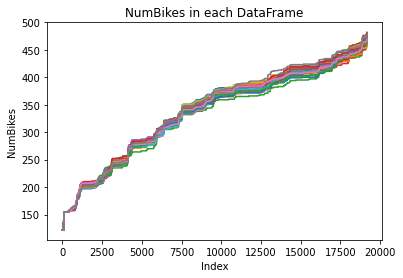

In [11]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Iterate through each DataFrame in df_total
for i, df in enumerate(df_total_user):
    # Assuming the column name is 'NumBikes'
    ax.plot(df['NumBikes'], label=f'DF {i+1}')

# Add labels and title to the plot
ax.set_xlabel('Index')
ax.set_ylabel('NumBikes')
ax.set_title('NumBikes in each DataFrame')

# Add a legend to identify each DataFrame's plot
#ax.legend()

# Show the plot
plt.show()

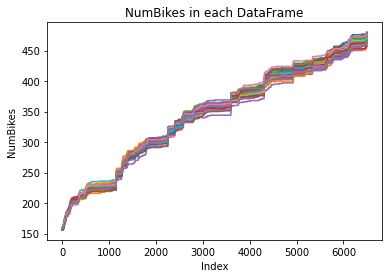

In [12]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Iterate through each DataFrame in df_total
for i, df in enumerate(df_total_food):
    # Assuming the column name is 'NumBikes'
    ax.plot(df['NumBikes'], label=f'DF {i+1}')

# Add labels and title to the plot
ax.set_xlabel('Index')
ax.set_ylabel('NumBikes')
ax.set_title('NumBikes in each DataFrame')

# Add a legend to identify each DataFrame's plot
#ax.legend()

# Show the plot
plt.show()

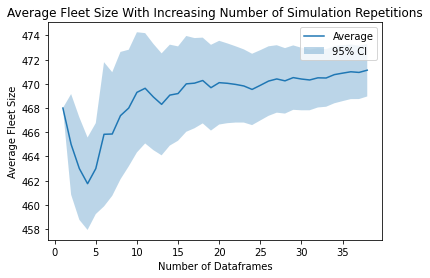

In [13]:
# Step 1: Create empty lists to store the maximum values, average values, and confidence intervals
max_values_day_7 = []
avg_values = []
ci_lower_values = []
ci_upper_values = []
ci_delta_values = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for i, df in enumerate(df_total_user):
    max_value_day_7 = df.loc[df['Day'] == 7, 'NumBikes'].max()
    max_values_day_7.append(max_value_day_7)
    
    # Calculate the average and confidence intervals with an increasing number of dataframes
    x_values = range(i + 1)
    avg_value = np.mean(max_values_day_7[:i + 1])
    std_value = np.std(max_values_day_7[:i + 1])
    ci_lower = avg_value - 1.96 * std_value / np.sqrt(i + 1)
    ci_upper = avg_value + 1.96 * std_value / np.sqrt(i + 1)
    ci_delta = ci_upper - ci_lower
    
    # Append the average, confidence interval, and delta values to their respective lists
    avg_values.append(avg_value)
    ci_lower_values.append(ci_lower)
    ci_upper_values.append(ci_upper)
    ci_delta_values.append(ci_delta)

# Step 3: Create the x-axis values
x_values = range(1, len(df_total_user) + 1)

# Step 4: Create the plot
plt.plot(x_values, avg_values, label='Average')
plt.fill_between(x_values, ci_lower_values, ci_upper_values, alpha=0.3, label='95% CI')
plt.xlabel('Number of Dataframes')
plt.ylabel('Average Fleet Size')
plt.title('Average Fleet Size With Increasing Number of Simulation Repetitions')
plt.legend()
plt.show()

# Step 5: Create a DataFrame with the data
data = {
    'Number of Dataframes': x_values,
    'Average': avg_values,
    'CI Lower': ci_lower_values,
    'CI Upper': ci_upper_values,
    'CI Delta': ci_delta_values
}
df_table_user = pd.DataFrame(data)



# Step 6: Save the DataFrame to a CSV file
#df_table.to_csv('average_ci_data.csv', index=False)


In [14]:
print(df_table_user)


    Number of Dataframes     Average    CI Lower    CI Upper   CI Delta
0                      1  468.000000  468.000000  468.000000   0.000000
1                      2  465.000000  460.842212  469.157788   8.315576
2                      3  463.000000  458.765916  467.234084   8.468168
3                      4  461.750000  457.930828  465.569172   7.638344
4                      5  463.000000  459.240068  466.759932   7.519864
5                      6  465.833333  459.873718  471.792949  11.919231
6                      7  465.857143  460.748718  470.965567  10.216849
7                      8  467.375000  462.109637  472.640363  10.530726
8                      9  468.000000  463.179283  472.820717   9.641433
9                     10  469.300000  464.333420  474.266580   9.933159
10                    11  469.636364  465.077745  474.194983   9.117238
11                    12  468.916667  464.525105  473.308228   8.783122
12                    13  468.307692  464.094861  472.520524   8

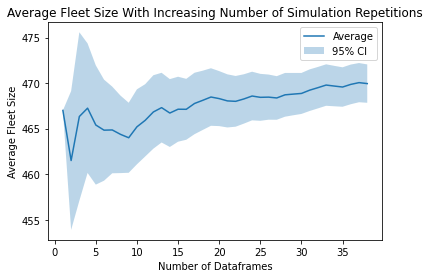

In [15]:
# Step 1: Create empty lists to store the maximum values, average values, and confidence intervals
max_values_day_7 = []
avg_values = []
ci_lower_values = []
ci_upper_values = []
ci_delta_values = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for i, df in enumerate(df_total_food):
    max_value_day_7 = df.loc[df['Day'] == 7, 'NumBikes'].max()
    max_values_day_7.append(max_value_day_7)
    
    # Calculate the average and confidence intervals with an increasing number of dataframes
    x_values = range(i + 1)
    avg_value = np.mean(max_values_day_7[:i + 1])
    std_value = np.std(max_values_day_7[:i + 1])
    ci_lower = avg_value - 1.96 * std_value / np.sqrt(i + 1)
    ci_upper = avg_value + 1.96 * std_value / np.sqrt(i + 1)
    ci_delta = ci_upper - ci_lower
    
    # Append the average, confidence interval, and delta values to their respective lists
    avg_values.append(avg_value)
    ci_lower_values.append(ci_lower)
    ci_upper_values.append(ci_upper)
    ci_delta_values.append(ci_delta)

# Step 3: Create the x-axis values
x_values = range(1, len(df_total_food) + 1)

# Step 4: Create the plot
plt.plot(x_values, avg_values, label='Average')
plt.fill_between(x_values, ci_lower_values, ci_upper_values, alpha=0.3, label='95% CI')
plt.xlabel('Number of Dataframes')
plt.ylabel('Average Fleet Size')
plt.title('Average Fleet Size With Increasing Number of Simulation Repetitions')
plt.legend()
plt.show()

# Step 5: Create a DataFrame with the data
data = {
    'Number of Dataframes': x_values,
    'Average': avg_values,
    'CI Lower': ci_lower_values,
    'CI Upper': ci_upper_values,
    'CI Delta': ci_delta_values
}
df_table_food = pd.DataFrame(data)



# Step 6: Save the DataFrame to a CSV file
#df_table.to_csv('average_ci_data.csv', index=False)


In [16]:
print(df_table_food)

    Number of Dataframes     Average    CI Lower    CI Upper   CI Delta
0                      1  467.000000  467.000000  467.000000   0.000000
1                      2  461.500000  453.877389  469.122611  15.245222
2                      3  466.333333  457.078418  475.588248  18.509830
3                      4  467.250000  460.136557  474.363443  14.226887
4                      5  465.400000  458.849963  471.950037  13.100075
5                      6  464.833333  459.281602  470.385065  11.103464
6                      7  464.857143  460.098319  469.615966   9.517647
7                      8  464.375000  460.118235  468.631765   8.513530
8                      9  464.000000  460.153277  467.846723   7.693445
9                     10  465.200000  461.081201  469.318799   8.237598
10                    11  465.909091  461.937158  469.881023   7.943865
11                    12  466.833333  462.800400  470.866267   8.065867
12                    13  467.307692  463.479314  471.136071   7

467 468 468
456 462 462
476 459 476
470 458 470
458 468 468
462 480 480
465 466 466
461 478 478
461 473 473
476 481 481
473 473 473
477 461 477
473 461 473
459 479 479
473 471 473
467 482 482
478 471 478
474 474 474
475 459 475
465 478 478
463 469 469
467 468 468
474 467 474
476 463 476
465 478 478
469 479 479
466 475 475
478 466 478
471 478 478
471 467 471
480 468 480
478 476 478
479 470 479
466 480 480
466 475 475
480 475 480
477 469 477
466 478 478


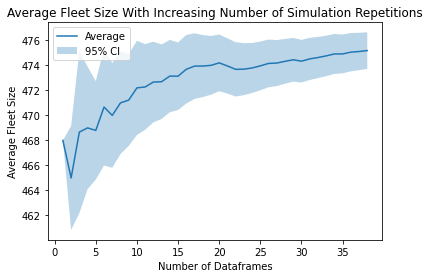

In [17]:
###In the mixed scenario, we need to combine the metrics

# Step 1: Create empty lists to store the maximum values, average values, and confidence intervals
max_values_day_7 = []
avg_values = []
ci_lower_values = []
ci_upper_values = []
ci_delta_values = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for i in range(max(numitems_people,numitems_food)):
    #Get that sim number from Users and Food
    df_f=df_total_food[i]
    df_u= df_total_user[i]

    #Find the max value 
    max_value_day_7_f = df_f.loc[df_f['Day'] == 7, 'NumBikes'].max()
    max_value_day_7_u = df_u.loc[df_u['Day'] == 7, 'NumBikes'].max()
    max_value_day_7 = max(max_value_day_7_f, max_value_day_7_u)
    max_values_day_7.append(max_value_day_7)
    
    print(max_value_day_7_f, max_value_day_7_u, max_value_day_7)
    # Calculate the average and confidence intervals with an increasing number of dataframes
    x_values = range(i + 1)
    avg_value = np.mean(max_values_day_7[:i + 1])
    std_value = np.std(max_values_day_7[:i + 1])
    ci_lower = avg_value - 1.96 * std_value / np.sqrt(i + 1)
    ci_upper = avg_value + 1.96 * std_value / np.sqrt(i + 1)
    ci_delta = ci_upper - ci_lower
    
    # Append the average, confidence interval, and delta values to their respective lists
    avg_values.append(avg_value)
    ci_lower_values.append(ci_lower)
    ci_upper_values.append(ci_upper)
    ci_delta_values.append(ci_delta)

# Step 3: Create the x-axis values
x_values = range(1, len(df_total_food) + 1)

# Step 4: Create the plot
plt.plot(x_values, avg_values, label='Average')
plt.fill_between(x_values, ci_lower_values, ci_upper_values, alpha=0.3, label='95% CI')
plt.xlabel('Number of Dataframes')
plt.ylabel('Average Fleet Size')
plt.title('Average Fleet Size With Increasing Number of Simulation Repetitions')
plt.legend()
plt.show()

# Step 5: Create a DataFrame with the data
data = {
    'Number of Dataframes': x_values,
    'Average': avg_values,
    'CI Lower': ci_lower_values,
    'CI Upper': ci_upper_values,
    'CI Delta': ci_delta_values
}
df_table_mixed = pd.DataFrame(data)

In [18]:
df_table_mixed

,Number of Dataframes,Average,CI Lower,CI Upper,CI Delta
0,1,468.000000,468.000000,468.000000,0.000000
1,2,465.000000,460.842212,469.157788,8.315576
2,3,468.666667,462.177035,475.156298,12.979263
3,4,469.000000,464.100000,473.900000,9.800000
4,5,468.800000,464.864351,472.735649,7.871298
5,6,470.666667,465.985711,475.347623,9.361912
6,7,470.000000,465.809344,474.190656,8.381313
7,8,471.000000,466.900366,475.099634,8.199268
8,9,471.222222,467.555039,474.889406,7.334367
9,10,472.200000,468.431903,475.968097,7.536194
